<a href="https://colab.research.google.com/github/nathanasales/Projeto-Bootcamp-CDIA/blob/main/Projeto_Bootcamp_CDIA_Nathana_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Configuração Inicial no Google Colab

In [78]:
# Instala bibliotecas necessárias

# Manipulação e análise de dados estruturados
import pandas as pd        # Manipulação de dados tabulares (DataFrames, Series)
import numpy as np         # Operações matemáticas e manipulação de arrays

# Visualização de dados e gráficos
import matplotlib.pyplot as plt      # Biblioteca base para criação de gráficos
import seaborn as sns                # Visualizações estatísticas

# Divisão e validação dos dados
from sklearn.model_selection import train_test_split     # Divide dados em treino e teste

# Transformação e normalização dos dados
from sklearn.preprocessing import StandardScaler         # Padroniza dados (média=0, desvio=1)

# Algoritmo de classificação baseados em árvores
from sklearn.ensemble import RandomForestClassifier     # Melhora a acurácia e evita overfitting

# Relatórios e matrizes
from sklearn.metrics import classification_report       # Relatório completo com todas as métricas
from sklearn.metrics import confusion_matrix            # Avalia o desempenho de um modelo de classificação

# Métricas básicas de classificação
from sklearn.metrics import accuracy_score              # Porcentagem de predições corretas
from sklearn.metrics import f1_score                    # Média harmônica entre precisão e recall

# XGBoost - gradient boosting otimizado
import xgboost as xgb                                   # Implementação otimizada de gradient boosting

2. Carregar e Explorar os Dados

In [79]:
# Carregar dados (fazer upload dos arquivos no Colab)
from google.colab import files

print("Faça o upload do arquivo bootcamp_train.csv:")
uploaded = files.upload()

# Obter o nome do arquivo carregado (útil se o nome for diferente)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Visualizar primeiras linhas
print("Primeiras linhas do dataset:")
display(df.head())

# Informações gerais
print("\nInformações gerais do dataset:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
valores_ausentes = df.isnull().sum()
display(valores_ausentes[valores_ausentes > 0] if valores_ausentes.sum() > 0 else "Não há valores ausentes")

# Verificar registros únicos por coluna (conforme solicitado)
print("\nRegistros únicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# Identificar colunas de falhas (targets)
colunas_falhas = [col for col in df.columns if col.startswith('falha_')]
print("\nColunas de falhas (targets):", colunas_falhas)

# Verificar distribuição das classes de falhas
print("\nDistribuição das classes de falhas:")
for col in colunas_falhas:
    # Verificar primeiro se a coluna existe
    if col in df.columns:
        # Usar value_counts() que é mais seguro e informativo
        valor_counts = df[col].value_counts(dropna=False)

        # Verificar se contém valores binários
        if 1 in valor_counts:
            positivos = valor_counts[1]
            percentage = (positivos / len(df)) * 100
            print(f"{col}: {positivos} ocorrências ({percentage:.2f}%)")
        else:
            print(f"{col}: Não contém valores positivos (1)")
    else:
        print(f"{col}: Coluna não encontrada no DataFrame")

Faça o upload do arquivo bootcamp_train.csv:


Saving bootcamp_train.csv to bootcamp_train (10).csv
Primeiras linhas do dataset:


,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
count,3390.000000,3390.000000,3334.00000,3.390000e+03,3.390000e+03,3390.0,3390.000000,3390.000000,3390.000000,3.290000e+03,...,3390.000000,3390.000000,3331.000000,3390.000000,3390.000000,3390.000000,3390.000000,3340.000000,3390.000000,3390.000000
mean,1694.500000,995.507375,605.90012,2.692640e+06,1.592301e+06,100.0,1566.317699,66.733923,47.261062,1.931079e+05,...,0.083130,0.192553,0.589012,2.476344,1.317755,1.395298,0.099153,-0.134957,0.570363,171.763422
std,978.753033,1796.737709,548.07724,5.625693e+06,1.821345e+06,0.0,4337.683975,195.092105,336.794632,4.549965e+05,...,0.381303,0.473771,0.480665,0.772512,0.479221,0.429142,0.492312,0.133175,0.335394,272.952080
min,0.000000,-11.000000,-186.00000,-2.000000e+01,-1.660000e+02,100.0,-206.000000,-229.000000,-194.000000,2.550000e+02,...,-0.905854,-1.218085,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.860300,0.119000,0.000000
25%,847.250000,41.000000,179.00000,3.934352e+05,3.407380e+05,100.0,68.000000,12.000000,11.000000,9.514500e+03,...,-0.165640,-0.136793,0.000000,1.929400,1.000000,1.079200,-0.285700,-0.193725,0.248200,71.000000
50%,1694.500000,614.000000,544.00000,1.265462e+06,1.128297e+06,100.0,142.000000,22.000000,21.000000,1.783600e+04,...,0.047686,0.115746,1.000000,2.225300,1.146100,1.322200,0.111100,-0.140800,0.472100,93.000000
75%,2541.750000,1187.500000,1090.00000,2.555025e+06,2.184335e+06,100.0,524.750000,58.000000,56.000000,6.797800e+04,...,0.263110,0.445916,1.000000,2.829625,1.477100,1.724300,0.526300,-0.079000,0.999300,111.000000
max,3389.000000,15266.000000,1713.00000,1.041366e+08,1.291709e+07,100.0,152655.000000,1275.000000,18152.000000,1.159141e+07,...,2.155819,1.941325,1.000000,5.183700,3.074100,4.258700,0.991700,0.591700,1.000000,2086.000000



Valores ausentes por coluna:


,0
x_maximo,56
soma_da_luminosidade,100
maximo_da_luminosidade,98
tipo_do_aço_A400,76
espessura_da_chapa_de_aço,41
index_quadrado,36
indice_global_externo,59
indice_de_luminosidade,50



Registros únicos por coluna:
id: 3390 valores únicos
x_minimo: 1136 valores únicos
x_maximo: 945 valores únicos
y_minimo: 2017 valores únicos
y_maximo: 1809 valores únicos
peso_da_placa: 1 valores únicos
area_pixels: 850 valores únicos
perimetro_x: 363 valores únicos
perimetro_y: 294 valores únicos
soma_da_luminosidade: 1783 valores únicos
maximo_da_luminosidade: 91 valores únicos
comprimento_do_transportador: 83 valores únicos
tipo_do_aço_A300: 8 valores únicos
tipo_do_aço_A400: 8 valores únicos
espessura_da_chapa_de_aço: 24 valores únicos
temperatura: 3390 valores únicos
index_de_bordas: 1347 valores únicos
index_vazio: 1286 valores únicos
index_quadrado: 745 valores únicos
index_externo_x: 433 valores únicos
indice_de_bordas_x: 778 valores únicos
indice_de_bordas_y: 618 valores únicos
indice_de_variacao_x: 3390 valores únicos
indice_de_variacao_y: 3390 valores únicos
indice_global_externo: 3 valores únicos
log_das_areas: 862 valores únicos
log_indice_x: 177 valores únicos
log_indic

3. Análise Exploratória Básica

🔍 DIAGNÓSTICO: Analisando inconsistências nas colunas de falha...
Colunas de falha encontradas: ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

📊 VALORES ÚNICOS POR COLUNA (primeiros 5):
falha_1: ['False' '0' '1' 'True' 'nao']
falha_2: ['0' 'False' 'True' 'y' '1']
falha_3: [False  True]
falha_4: ['False' 'True' 'nao' '0' 'S']
falha_5: ['não' 'Não' 'Sim' 'sim']
falha_6: [False  True]
falha_outros: ['Sim' 'Não']

⚙️ APLICANDO CORREÇÃO...
falha_1: 275 falhas (8.11%)
falha_2: 264 falhas (7.79%)
falha_3: 649 falhas (19.14%)
falha_4: 116 falhas (3.42%)
falha_5: 96 falhas (2.83%)
falha_6: 806 falhas (23.78%)
falha_outros: 1184 falhas (34.93%)

✅ CORREÇÃO CONCLUÍDA!
📌 falha_5 agora aparece com 96 ocorrências
Exemplo de valores em cada coluna:
falha_1 - primeiros 5 valores: ['False', 'False', 'False', 'False', 'False']
falha_1 - tipo de dados: object
falha_2 - primeiros 5 valores: ['0', 'False', 'False', 'False', 'True']
falha_2 - tipo de dados: object
falha_

<Figure size 1000x600 with 0 Axes>

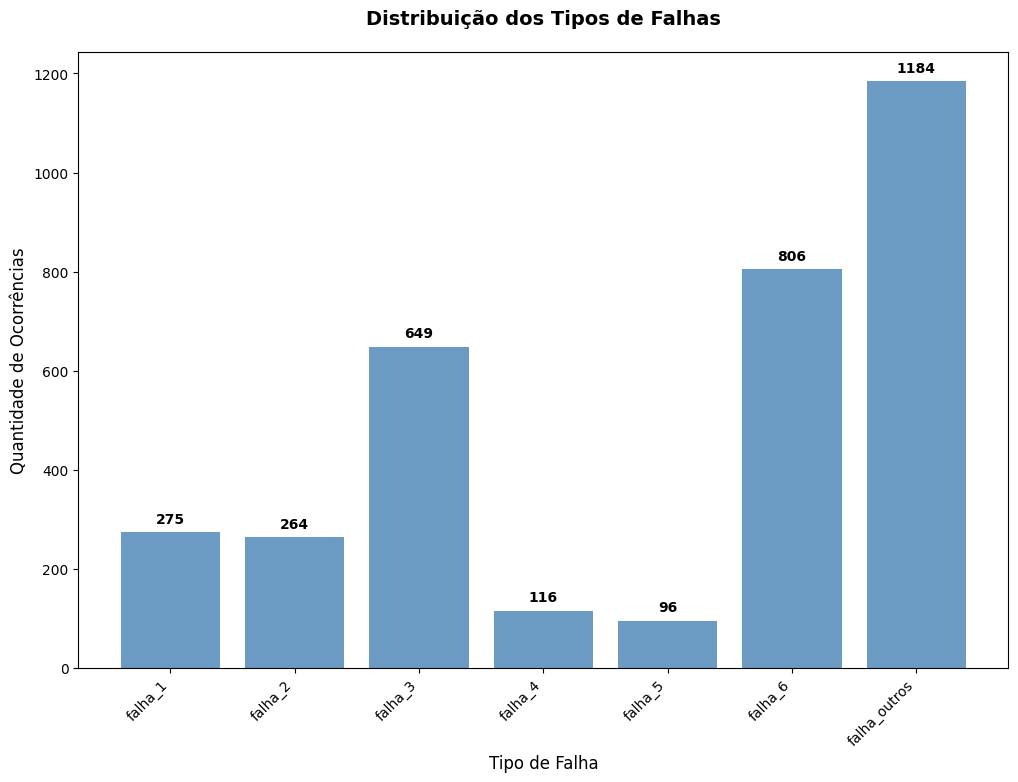

In [80]:
# ========================================
# 3. CORREÇÃO E ANÁLISE DE FALHAS
# ========================================

# Esta seção corrige o problema de inconsistência nos dados de falha
# identificado no dataset bootcamp_train.csv

print("🔍 DIAGNÓSTICO: Analisando inconsistências nas colunas de falha...")

# Identificar todas as colunas de falha
colunas_falhas = [col for col in df.columns if col.startswith('falha_')]
print(f"Colunas de falha encontradas: {colunas_falhas}")

# Analisar valores únicos em cada coluna para identificar problemas
print("\n📊 VALORES ÚNICOS POR COLUNA (primeiros 5):")
for col in colunas_falhas:
    valores_unicos = df[col].unique()[:5]
    print(f"{col}: {valores_unicos}")

# Função de normalização inteligente
def normalizar_coluna_falha(serie):
    """
    Função que resolve o problema da falha_5 e outras inconsistências.
    Converte qualquer formato para binário (0/1) de forma inteligente.
    """
    def normalizar_valor(valor):
        # Valores ausentes = sem falha
        if pd.isna(valor) or valor == '' or valor is None:
            return 0

        # Processar strings (como 'Sim', 'Não', 'True', 'False')
        if isinstance(valor, str):
            valor_lower = valor.lower().strip()
            # Padrões que indicam presença de falha
            falha_presente = ['true', '1', 'sim', 'yes', 'y', 's']
            return 1 if valor_lower in falha_presente else 0

        # Processar booleanos
        elif isinstance(valor, bool):
            return 1 if valor else 0

        # Processar números
        else:
            try:
                return 1 if float(valor) > 0 else 0
            except:
                return 0

    return serie.apply(normalizar_valor)

# Aplicar correção e calcular estatísticas
print("\n⚙️ APLICANDO CORREÇÃO...")
resultados_falhas = []

for col in colunas_falhas:
    # Aplicar normalização
    valores_normalizados = normalizar_coluna_falha(df[col])

    # Calcular estatísticas
    total_falhas = valores_normalizados.sum()
    percentual = (total_falhas / len(df)) * 100

    # Armazenar resultado
    resultados_falhas.append({
        'tipo_falha': col,
        'quantidade': total_falhas,
        'percentual': percentual
    })

    print(f"{col}: {total_falhas} falhas ({percentual:.2f}%)")

# Converter para DataFrame para facilitar manipulação
df_falhas_corrigido = pd.DataFrame(resultados_falhas)

print(f"\n✅ CORREÇÃO CONCLUÍDA!")
print(f"📌 falha_5 agora aparece com {df_falhas_corrigido[df_falhas_corrigido['tipo_falha']=='falha_5']['quantidade'].iloc[0]} ocorrências")

# Gráfico de distribuição das falhas
# Este código cria um gráfico de barras que mostra quantas vezes cada tipo de falha ocorre no conjunto de dados
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico (largura x altura) em polegadas

# Vamos examinar os dados para entender com que tipo de informação estamos lidando
print("Exemplo de valores em cada coluna:")
for col in colunas_falhas:
    # Mostra os primeiros 5 valores de cada coluna para entendermos o formato dos dados
    print(f"{col} - primeiros 5 valores: {df[col].head().tolist()}")
    # Mostra o tipo de dados de cada coluna (número, texto, booleano, etc.)
    print(f"{col} - tipo de dados: {df[col].dtype}")

# ========================================
# CORREÇÃO DO PROBLEMA DE DISTRIBUIÇÃO DE FALHAS
# ========================================

def normalizar_coluna_falha(serie):
    """
    Normaliza qualquer coluna de falha para formato binário (0/1)
    independentemente do formato original (Boolean, String, Numeric)
    """
    def normalizar_valor(valor):
        # Tratar valores ausentes
        if pd.isna(valor) or valor == '' or valor is None:
            return 0

        # Converter para string e normalizar case
        if isinstance(valor, str):
            valor_norm = valor.lower().strip()
            # Valores que indicam presença de falha
            valores_positivos = ['true', '1', 'sim', 'yes', 'y', 's']
            return 1 if valor_norm in valores_positivos else 0

        # Tratar valores booleanos
        elif isinstance(valor, bool):
            return 1 if valor else 0

        # Tratar valores numéricos
        else:
            try:
                return 1 if float(valor) > 0 else 0
            except:
                return 0

    return serie.apply(normalizar_valor)

# Aplicar normalização e calcular contagens corrigidas
print("🔧 APLICANDO CORREÇÃO PARA DISTRIBUIÇÃO DE FALHAS...")
colunas_falhas_labels = []
counts = []

for col in colunas_falhas:
    print(f"Processando {col}...")

    # Mostrar alguns valores originais para debug
    print(f"  Valores únicos originais: {df[col].unique()[:5]}")

    # Normalizar a coluna usando nossa função inteligente
    valores_normalizados = normalizar_coluna_falha(df[col])

    # Contar as falhas após normalização
    count = valores_normalizados.sum()

    # Armazenar resultados
    colunas_falhas_labels.append(str(col))
    counts.append(count)

    print(f"  Após normalização: {count} falhas")

print(f"\n✅ Normalização concluída. Todas as {len(colunas_falhas)} falhas foram processadas.")

# Exibe as contagens para verificarmos se estão corretas
print("Contagens calculadas:", counts)

# Criar gráfico com dados corrigidos
print("\n📊 CRIANDO GRÁFICO DE DISTRIBUIÇÃO CORRIGIDO...")

# Extrair dados do DataFrame de resultados
if 'df_falhas_corrigido' in locals():
    labels = df_falhas_corrigido['tipo_falha'].tolist()
    quantities = df_falhas_corrigido['quantidade'].tolist()
else:
    # Fallback se usando a Opção 1
    labels = colunas_falhas_labels
    quantities = counts

# Criar o gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(labels)), quantities, color='steelblue', alpha=0.8)

# Personalizar o gráfico
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.title('Distribuição dos Tipos de Falhas',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Tipo de Falha', fontsize=12)
plt.ylabel('Quantidade de Ocorrências', fontsize=12)

# Adicionar valores nas barras
for i, v in enumerate(quantities):
    plt.text(i, v + max(quantities) * 0.01, str(v),
             ha='center', va='bottom', fontweight='bold')

print("✅ Gráfico criado com sucesso!")
print(f"📌 Total de tipos de falha visualizados: {len(labels)}")

4. Pré-processamento e Preparação dos Dados



In [81]:
# Selecionar falha específica para trabalhar (escolha uma com distribuição razoável)
falha_escolhida = 'falha_1'
print(f"Falha escolhida para modelagem inicial: {falha_escolhida}")
print(f"Distribuição: {df[falha_escolhida].value_counts()}")

# Preparar X e y
X = df.drop(colunas_falhas, axis=1)
y = df[falha_escolhida]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Dimensões do conjunto de treino: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensões do conjunto de teste: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Identificar variáveis categóricas e numéricas (conforme solicitado)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Variáveis categóricas: {cat_cols}")
print(f"Variáveis numéricas: {len(num_cols)} colunas")

# Padronizar variáveis numéricas (conforme solicitado)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

Falha escolhida para modelagem inicial: falha_1
Distribuição: falha_1
False    2992
True      265
nao        62
0          61
1           5
S           5
Name: count, dtype: int64
Dimensões do conjunto de treino: X_train: (2373, 32), y_train: (2373,)
Dimensões do conjunto de teste: X_test: (1017, 32), y_test: (1017,)
Variáveis categóricas: ['tipo_do_aço_A300', 'tipo_do_aço_A400']
Variáveis numéricas: 30 colunas


5. Modelagem Básica

Verificando o formato dos dados...
Valores únicos em y_train: ['False' 'True' '0' 'nao' 'S' '1']
Após conversão - valores únicos em y_train_num: [0 1]
Verificando se X tem colunas com strings...
Colunas com texto encontradas: ['tipo_do_aço_A300', 'tipo_do_aço_A400']
Recomenda-se usar OneHotEncoder para estas colunas.
Removendo colunas de texto: ['tipo_do_aço_A300', 'tipo_do_aço_A400']

Treinando modelo: Regressão Logística
Erro ao treinar o modelo Regressão Logística: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN va

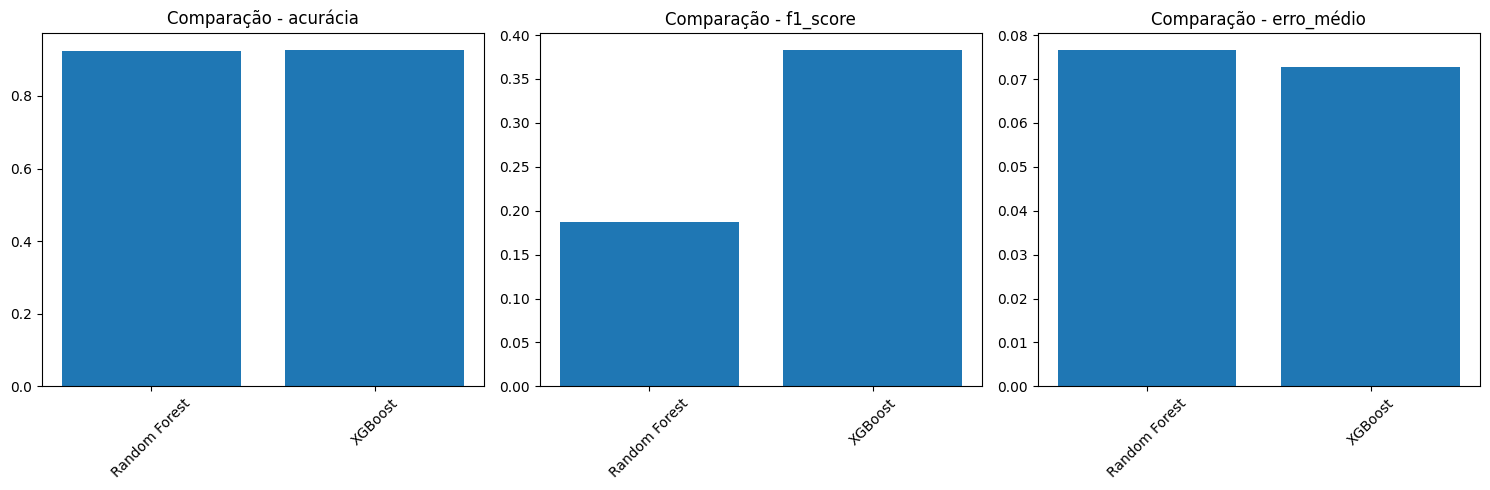


Melhor modelo: XGBoost
F1-Score: 0.3833
Este modelo acertou 92.7% das previsões


In [82]:
# PARTE 5: MODELAGEM BÁSICA
# Treinar diferentes modelos para descobrir qual funciona melhor

# Importar as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Definir quais modelos vamos testar
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Antes de treinar, vamos verificar e corrigir o formato dos dados
print("Verificando o formato dos dados...")

# Verificar o target (variável alvo)
print(f"Valores únicos em y_train: {y_train.unique()}")

# Converter adequadamente para valores numéricos (0 e 1)
# Isso vai resolver problemas com strings como 'Não', 'True', 'False', etc.
def converter_para_numerico(y):
    # Se já for numérico, não precisa converter
    if pd.api.types.is_numeric_dtype(y):
        return y

    # Converter diferentes tipos de valores para números
    # Valores considerados "positivos" (defeito presente)
    valores_positivos = ['True', 'true', 'Sim', 'sim', '1', 'Yes', 'yes', True]

    # Novo Series com valores 0 e 1
    y_numerico = pd.Series(0, index=y.index)

    # Para cada valor positivo, marcamos como 1
    for valor in valores_positivos:
        mascara = (y == valor)
        if mascara.any():
            y_numerico.loc[mascara] = 1

    return y_numerico

# Aplicar a conversão
y_train_num = converter_para_numerico(y_train)
y_test_num = converter_para_numerico(y_test)

print(f"Após conversão - valores únicos em y_train_num: {y_train_num.unique()}")

# Verificar se X também tem strings que precisam ser convertidas
print("Verificando se X tem colunas com strings...")
colunas_objeto = X_train.select_dtypes(include=['object']).columns.tolist()
if colunas_objeto:
    print(f"Colunas com texto encontradas: {colunas_objeto}")
    print("Recomenda-se usar OneHotEncoder para estas colunas.")

    # Abordagem simples: remover colunas de texto se houver poucas
    if len(colunas_objeto) < 3:
        print(f"Removendo colunas de texto: {colunas_objeto}")
        X_train_scaled = X_train_scaled.drop(columns=colunas_objeto)
        X_test_scaled = X_test_scaled.drop(columns=colunas_objeto)
    else:
        # Se houver muitas colunas de texto, escolher abordagem mais elaborada
        print("Muitas colunas de texto encontradas. Precisamos ajustar o código.")
else:
    print("Não foram encontradas colunas de texto em X.")

# Treinar cada modelo
resultados = {}

for nome, modelo in modelos.items():
    print(f"\nTreinando modelo: {nome}")

    # Treinar o modelo com nossos dados já convertidos
    try:
        modelo.fit(X_train_scaled, y_train_num)

        # Usar o modelo para fazer previsões
        y_pred = modelo.predict(X_test_scaled)

        # Calcular métricas de desempenho
        acc = accuracy_score(y_test_num, y_pred)
        f1 = f1_score(y_test_num, y_pred, average='binary')
        erro = np.mean(np.abs(y_test_num - y_pred))

        # Guardar resultados
        resultados[nome] = {
            'acurácia': acc,
            'f1_score': f1,
            'erro_médio': erro,
            'modelo': modelo
        }

        # Mostrar resultados
        print(f"Acurácia: {acc:.4f} (quanto maior, melhor - máximo é 1.0)")
        print(f"F1-Score: {f1:.4f} (quanto maior, melhor - máximo é 1.0)")
        print(f"Erro Médio: {erro:.4f} (quanto menor, melhor - mínimo é 0.0)")

        # Matriz de confusão
        print("\nMatriz de Confusão:")
        matriz = confusion_matrix(y_test_num, y_pred)
        print(matriz)

        # Explicação simples da matriz de confusão
        print("\nExplicação da matriz de confusão:")
        print(f"- {matriz[0,0]} amostras foram corretamente classificadas como sem defeito")
        print(f"- {matriz[0,1]} amostras sem defeito foram incorretamente classificadas como defeituosas")
        print(f"- {matriz[1,0]} amostras com defeito foram incorretamente classificadas como sem defeito")
        print(f"- {matriz[1,1]} amostras foram corretamente classificadas como defeituosas")

        # Relatório de classificação
        print("\nRelatório de Classificação:")
        print(classification_report(y_test_num, y_pred))

    except Exception as e:
        print(f"Erro ao treinar o modelo {nome}: {e}")
        print("Pulando para o próximo modelo...")
        continue

# Verificar se pelo menos um modelo foi treinado com sucesso
if resultados:
    # Criar gráficos somente se tivermos resultados
    print("\nCriando gráfico de comparação dos modelos...")
    metricas = ['acurácia', 'f1_score', 'erro_médio']
    modelos_nomes = list(resultados.keys())

    # Preparar figura com 3 gráficos
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Para cada métrica, criar gráfico de barras
    for i, metrica in enumerate(metricas):
        # Extrair valores desta métrica para cada modelo
        valores = [resultados[modelo][metrica] for modelo in modelos_nomes]

        # Criar posições para as barras
        posicoes = list(range(len(modelos_nomes)))

        # Desenhar as barras
        axs[i].bar(posicoes, valores)

        # Configurar rótulos e título
        axs[i].set_title(f'Comparação - {metrica}')
        axs[i].set_xticks(posicoes)
        axs[i].set_xticklabels(modelos_nomes, rotation=45)

    # Ajustar layout e mostrar gráfico
    plt.tight_layout()
    plt.show()

    # Escolher o melhor modelo com base no F1-Score
    melhor_modelo_nome = max(resultados, key=lambda x: resultados[x]['f1_score'])
    melhor_modelo = resultados[melhor_modelo_nome]['modelo']

    print(f"\nMelhor modelo: {melhor_modelo_nome}")
    print(f"F1-Score: {resultados[melhor_modelo_nome]['f1_score']:.4f}")
    print(f"Este modelo acertou {resultados[melhor_modelo_nome]['acurácia']*100:.1f}% das previsões")
else:
    print("Nenhum modelo foi treinado com sucesso. Verifique os dados e tente novamente.")

6. Análise de Importância das Features e Insights

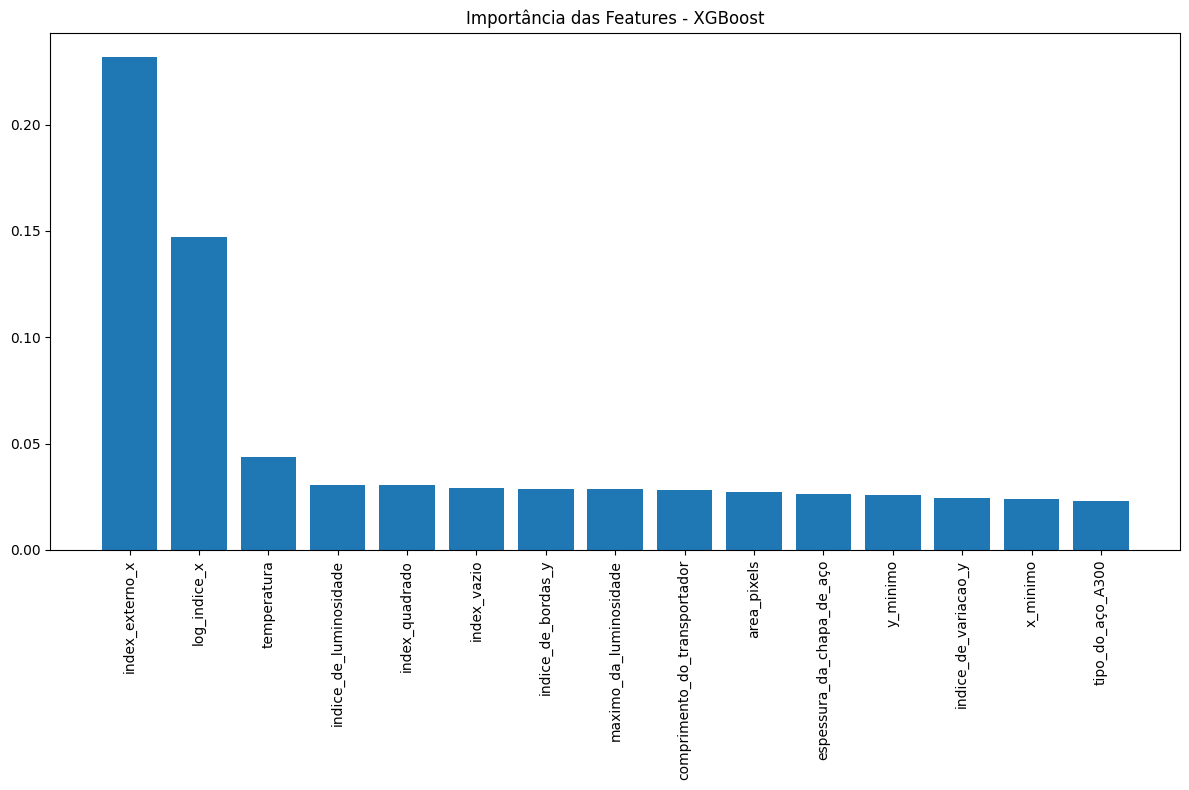

Top 10 features mais importantes:
1. index_externo_x: 0.2315
2. log_indice_x: 0.1470
3. temperatura: 0.0438
4. indice_de_luminosidade: 0.0306
5. index_quadrado: 0.0303
6. index_vazio: 0.0292
7. indice_de_bordas_y: 0.0288
8. maximo_da_luminosidade: 0.0286
9. comprimento_do_transportador: 0.0280
10. area_pixels: 0.0273

Características distintivas para falha escolhida:


In [83]:
# Extrair importância das features do melhor modelo
if hasattr(melhor_modelo, 'feature_importances_'):
    importancias = melhor_modelo.feature_importances_
    indices = np.argsort(importancias)[::-1]

    # Visualizar as 15 features mais importantes
    plt.figure(figsize=(12, 8))
    plt.title(f'Importância das Features - {melhor_modelo_nome}')
    plt.bar(range(15), importancias[indices][:15])
    plt.xticks(range(15), X.columns[indices][:15], rotation=90)
    plt.tight_layout()
    plt.show()

    print("Top 10 features mais importantes:")
    for i in range(10):
        print(f"{i+1}. {X.columns[indices][i]}: {importancias[indices][i]:.4f}")

# Analisar características das falhas
print("\nCaracterísticas distintivas para falha escolhida:")
for col in ['area_pixels', 'perimetro_x', 'soma_da_luminosidade', 'index_de_bordas', 'temperatura']:
    stats_with_defect = df[df[falha_escolhida] == 1][col].mean()
    stats_without_defect = df[df[falha_escolhida] == 0][col].mean()
    diff_percent = ((stats_with_defect - stats_without_defect) / stats_without_defect) * 100

    if abs(diff_percent) > 5:  # Threshold arbitrário
        direction = "maior" if diff_percent > 0 else "menor"
        print(f"- {col} é {direction} em {abs(diff_percent):.1f}% nas amostras com defeito")

7. Estender o Modelo para Todas as Falhas


Treinando modelos para todas as falhas:

Verificando e convertendo colunas categóricas em X...
Colunas categóricas encontradas: ['tipo_do_aço_A300', 'tipo_do_aço_A400']
Coluna com múltiplos valores: tipo_do_aço_A300 - valores únicos: ['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']
Coluna com múltiplos valores: tipo_do_aço_A400 - valores únicos: ['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']
Conversão concluída. X agora tem 46 colunas.

=== Treinando modelo para falha_1 ===
Valores únicos antes da conversão: ['False' '0' '1' 'True' 'nao' 'S']
Valores únicos após conversão: [0 1]
Usando RandomForest que é mais robusto com diferentes tipos de dados
Acurácia: 0.9233 (porcentagem de acertos)
F1-Score: 0.0930 (equilíbrio entre precisão e sensibilidade)

Matriz de Confusão:
[[935   0]
 [ 78   4]]

Explicação da matriz de confusão:
- 935 amostras foram corretamente classificadas como sem defeito
- 0 amostras sem defeito foram incorretamente classificadas como defeituosas
- 78 amostras com defeito 

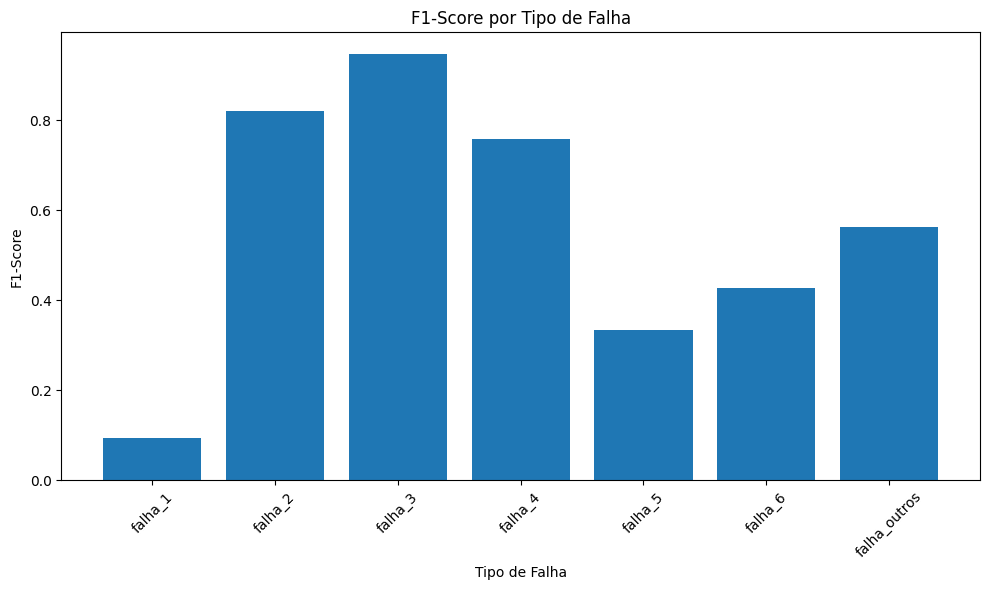


Melhor desempenho: falha_3 com F1-Score de 0.9485
Pior desempenho: falha_1 com F1-Score de 0.0930

Features mais importantes para falha_3:
1. log_indice_x: 0.1214
2. index_externo_x: 0.1155
3. log_das_areas: 0.1031
4. indice_de_variacao_y: 0.0994
5. perimetro_x: 0.0807
6. indice_de_bordas_y: 0.0545
7. soma_da_luminosidade: 0.0544
8. area_pixels: 0.0532
9. sigmoide_das_areas: 0.0461
10. log_indice_y: 0.0309


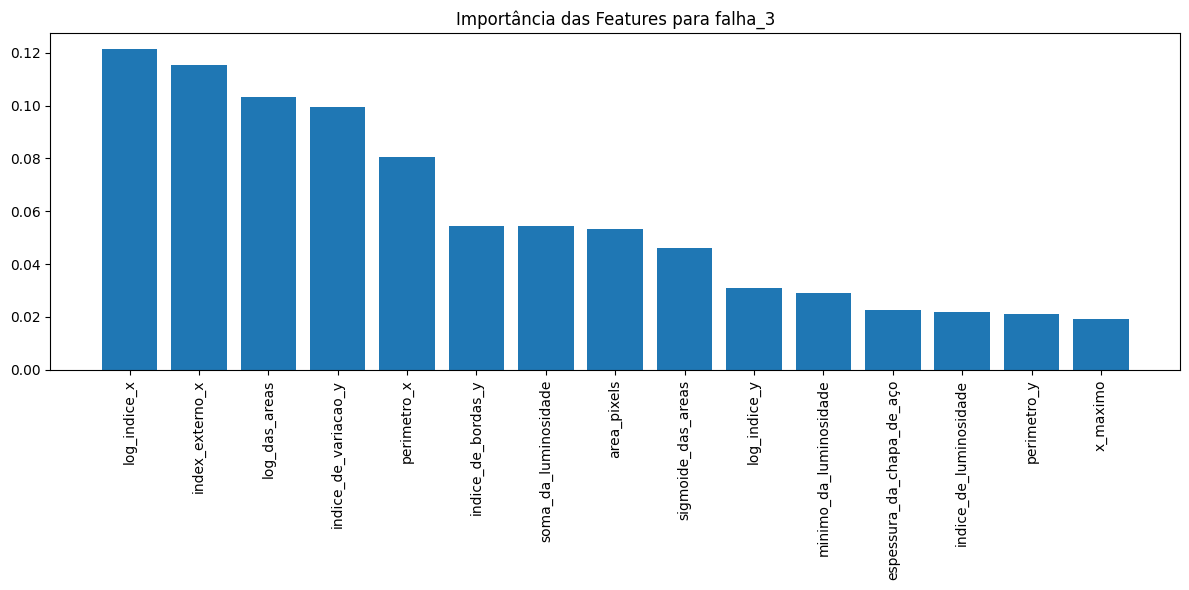

In [84]:
# Abordagem para todas as falhas
print("\nTreinando modelos para todas as falhas:")

# Função para converter valores de texto para numéricos
def converter_para_numerico(y):
    # Se já for numérico, não precisa converter
    if pd.api.types.is_numeric_dtype(y):
        return y

    # Valores considerados "positivos" (defeito presente)
    valores_positivos = ['True', 'true', 'Sim', 'sim', 'S', 's', '1', 'Yes', 'yes', True, 1]

    # Novo Series com valores 0 e 1
    y_numerico = pd.Series(0, index=y.index)

    # Para cada valor positivo, marcamos como 1
    for valor in valores_positivos:
        mascara = (y == valor)
        if mascara.any():
            y_numerico.loc[mascara] = 1

    return y_numerico

# Verificar e converter colunas categóricas em X
print("\nVerificando e convertendo colunas categóricas em X...")
colunas_objeto = X.select_dtypes(include=['object']).columns.tolist()

if colunas_objeto:
    print(f"Colunas categóricas encontradas: {colunas_objeto}")

    # Criar uma cópia de X para não modificar o original
    X_convertido = X.copy()

    # Converter cada coluna categórica para numérica
    for col in colunas_objeto:
        # Se a coluna tiver apenas dois valores únicos (binária)
        if X_convertido[col].nunique() <= 2:
            print(f"Convertendo coluna binária: {col}")
            # Converter para 0 e 1
            X_convertido[col] = X_convertido[col].apply(
                lambda x: 1 if x in ['True', 'true', 'Sim', 'sim', 'S', 's', '1', 'Yes', 'yes', True, 1] else 0
            )
            # Garantir que seja numérico
            X_convertido[col] = X_convertido[col].astype(int)
        else:
            # Se tiver mais de dois valores, fazer codificação one-hot
            print(f"Coluna com múltiplos valores: {col} - valores únicos: {X_convertido[col].unique()}")
            # Criar colunas dummy (0 e 1) para cada valor único
            dummies = pd.get_dummies(X_convertido[col], prefix=col, drop_first=False)
            # Adicionar as novas colunas ao dataframe
            X_convertido = pd.concat([X_convertido, dummies], axis=1)
            # Remover a coluna original
            X_convertido = X_convertido.drop(columns=[col])

    print(f"Conversão concluída. X agora tem {X_convertido.shape[1]} colunas.")
    # Atualizar X para a versão convertida
    X = X_convertido
else:
    print("Não foram encontradas colunas categóricas em X.")

# Treinar um modelo para cada tipo de falha
modelos_por_falha = {}

for falha in colunas_falhas:
    print(f"\n=== Treinando modelo para {falha} ===")

    # Preparar target
    y = df[falha]

    # Verificar valores únicos em y antes da conversão
    print(f"Valores únicos antes da conversão: {y.unique()}")

    # Converter para formato numérico
    y = converter_para_numerico(y)

    # Verificar valores únicos após conversão
    print(f"Valores únicos após conversão: {y.unique()}")

    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Padronizar variáveis numéricas
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Aplicar scaler apenas em colunas numéricas
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

    # Usar Random Forest que lida bem com qualquer tipo de dados
    print("Usando RandomForest que é mais robusto com diferentes tipos de dados")
    modelo = RandomForestClassifier(n_estimators=100, random_state=42)

    try:
        # Treinar o modelo
        modelo.fit(X_train_scaled, y_train)

        # Avaliar desempenho
        y_pred = modelo.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Acurácia: {acc:.4f} (porcentagem de acertos)")
        print(f"F1-Score: {f1:.4f} (equilíbrio entre precisão e sensibilidade)")

        # Matriz de confusão com explicação
        matriz = confusion_matrix(y_test, y_pred)
        print("\nMatriz de Confusão:")
        print(matriz)
        print("\nExplicação da matriz de confusão:")
        if matriz.shape == (2, 2):  # Se for uma matriz 2x2
            print(f"- {matriz[0,0]} amostras foram corretamente classificadas como sem defeito")
            print(f"- {matriz[0,1]} amostras sem defeito foram incorretamente classificadas como defeituosas")
            print(f"- {matriz[1,0]} amostras com defeito foram incorretamente classificadas como sem defeito")
            print(f"- {matriz[1,1]} amostras foram corretamente classificadas como defeituosas")

        # Armazenar modelo
        modelos_por_falha[falha] = {
            'modelo': modelo,
            'acurácia': acc,
            'f1_score': f1
        }
    except Exception as e:
        print(f"Erro ao treinar modelo para {falha}: {e}")
        continue

# Verificar se tem modelos treinados
if modelos_por_falha:
    # Comparar desempenho entre falhas
    falhas = list(modelos_por_falha.keys())
    f1_scores = [modelos_por_falha[falha]['f1_score'] for falha in falhas]

    plt.figure(figsize=(10, 6))

    # Criar posições para as barras
    posicoes = list(range(len(falhas)))

    # Desenhar as barras
    plt.bar(posicoes, f1_scores)

    # Configurar eixos e título
    plt.title('F1-Score por Tipo de Falha')
    plt.xlabel('Tipo de Falha')
    plt.ylabel('F1-Score')
    plt.xticks(posicoes, falhas, rotation=45)
    plt.tight_layout()
    plt.show()

    # Identificar o melhor e pior desempenho
    melhor_falha = max(modelos_por_falha, key=lambda x: modelos_por_falha[x]['f1_score'])
    pior_falha = min(modelos_por_falha, key=lambda x: modelos_por_falha[x]['f1_score'])

    print(f"\nMelhor desempenho: {melhor_falha} com F1-Score de {modelos_por_falha[melhor_falha]['f1_score']:.4f}")
    print(f"Pior desempenho: {pior_falha} com F1-Score de {modelos_por_falha[pior_falha]['f1_score']:.4f}")

    # Mostrar features mais importantes para o melhor modelo
    if hasattr(modelos_por_falha[melhor_falha]['modelo'], 'feature_importances_'):
        importancias = modelos_por_falha[melhor_falha]['modelo'].feature_importances_
        features = X.columns

        # Ordenar features por importância
        indices = np.argsort(importancias)[::-1]

        print(f"\nFeatures mais importantes para {melhor_falha}:")
        for i in range(min(10, len(features))):
            print(f"{i+1}. {features[indices[i]]}: {importancias[indices[i]]:.4f}")

        # Gráfico de importância das features
        plt.figure(figsize=(12, 6))
        plt.title(f'Importância das Features para {melhor_falha}')
        plt.bar(range(min(15, len(features))), importancias[indices[:15]])
        plt.xticks(range(min(15, len(features))), features[indices[:15]], rotation=90)
        plt.tight_layout()
        plt.show()
else:
    print("Nenhum modelo foi treinado com sucesso. Verifique os dados e tente novamente.")

8. Avaliar no Conjunto de Teste Final

In [85]:
# Carregar o conjunto de teste final
# Faça upload do bootcamp_test.csv
uploaded = files.upload()
df_test = pd.read_csv('bootcamp_test.csv')

print(f"Dimensões do conjunto de teste final: {df_test.shape}")

# Preparar o conjunto de teste
X_test_final = df_test.drop([col for col in df_test.columns if col.startswith('falha_')], axis=1)

# Verificar se X_test_final tem as mesmas colunas que X
print("\nVerificando colunas do conjunto de teste...")
print(f"Colunas no conjunto de treino: {len(X.columns)}")
print(f"Colunas no conjunto de teste: {len(X_test_final.columns)}")

# Verificar e converter colunas categóricas em X_test_final
print("\nConvertendo colunas categóricas no conjunto de teste...")
colunas_objeto_teste = X_test_final.select_dtypes(include=['object']).columns.tolist()
if colunas_objeto_teste:
    print(f"Colunas categóricas encontradas no conjunto de teste: {colunas_objeto_teste}")

    # Aplicar as mesmas transformações que foram aplicadas no conjunto de treino
    X_test_final_convertido = X_test_final.copy()

    for col in colunas_objeto_teste:
        # Se a coluna tiver apenas dois valores únicos (binária)
        if X_test_final_convertido[col].nunique() <= 2:
            print(f"Convertendo coluna binária: {col}")
            # Converter para 0 e 1
            X_test_final_convertido[col] = X_test_final_convertido[col].apply(
                lambda x: 1 if x in ['True', 'true', 'Sim', 'sim', 'S', 's', '1', 'Yes', 'yes', True, 1] else 0
            )
            # Garantir que seja numérico
            X_test_final_convertido[col] = X_test_final_convertido[col].astype(int)
        else:
            # Se tiver mais de dois valores, fazer codificação one-hot
            print(f"Coluna com múltiplos valores: {col} - valores únicos: {X_test_final_convertido[col].unique()}")
            # Criar colunas dummy (0 e 1) para cada valor único
            dummies = pd.get_dummies(X_test_final_convertido[col], prefix=col, drop_first=False)
            # Adicionar as novas colunas ao dataframe
            X_test_final_convertido = pd.concat([X_test_final_convertido, dummies], axis=1)
            # Remover a coluna original
            X_test_final_convertido = X_test_final_convertido.drop(columns=[col])

    print(f"Conversão concluída. X_test_final agora tem {X_test_final_convertido.shape[1]} colunas.")
    # Atualizar X_test_final para a versão convertida
    X_test_final = X_test_final_convertido
else:
    print("Não foram encontradas colunas categóricas em X_test_final.")

# IMPORTANTE: Garantir que X_test_final tenha as mesmas colunas que X na mesma ordem
# Isso é crítico para que o modelo possa fazer previsões corretas

# Verificar colunas faltantes em X_test_final
colunas_faltantes = set(X.columns) - set(X_test_final.columns)
if colunas_faltantes:
    print(f"\nColunas faltantes em X_test_final: {colunas_faltantes}")
    # Adicionar colunas faltantes com valor 0
    for col in colunas_faltantes:
        X_test_final[col] = 0
        print(f"Adicionada coluna faltante: {col}")

# Verificar colunas extras em X_test_final
colunas_extras = set(X_test_final.columns) - set(X.columns)
if colunas_extras:
    print(f"\nColunas extras em X_test_final: {colunas_extras}")
    # Remover colunas extras
    X_test_final = X_test_final.drop(columns=list(colunas_extras))
    print(f"Removidas {len(colunas_extras)} colunas extras.")

# Garantir a mesma ordem das colunas
X_test_final = X_test_final[X.columns]
print(f"\nAgora X_test_final tem exatamente as mesmas {len(X_test_final.columns)} colunas que X, na mesma ordem.")

# Padronizar
print("\nPadronizando as variáveis numéricas...")
num_cols_final = X_test_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_test_final_scaled = X_test_final.copy()
scaler = StandardScaler()
X_test_final_scaled[num_cols_final] = scaler.fit_transform(X_test_final[num_cols_final])

# Fazer predições para cada falha
print("\nFazendo predições para cada tipo de falha...")
resultados_finais = pd.DataFrame({'id': df_test['id']})

for falha in modelos_por_falha.keys():
    print(f"\nFazendo predições para {falha}...")
    modelo = modelos_por_falha[falha]['modelo']

    try:
        # Predições
        y_pred = modelo.predict(X_test_final_scaled)
        resultados_finais[falha] = y_pred

        # Se o modelo suporta predict_proba, adicionar probabilidades
        if hasattr(modelo, 'predict_proba'):
            y_proba = modelo.predict_proba(X_test_final_scaled)
            resultados_finais[f'prob_{falha}'] = y_proba[:, 1]
            print(f"Adicionadas probabilidades para {falha}")

        print(f"Predições concluídas. Distribuição das predições para {falha}:")
        print(resultados_finais[falha].value_counts())

    except Exception as e:
        print(f"Erro ao fazer predições para {falha}: {e}")

# Verificar se tem resultados
if len(resultados_finais.columns) > 1:  # Mais colunas além de 'id'
    # Salvar resultados
    resultados_finais.to_csv('predicoes_finais.csv', index=False)
    print("\nPredições finais salvas em 'predicoes_finais.csv'")

    # Mostrar primeiras linhas do resultado
    print("\nPrimeiras linhas das predições:")
    print(resultados_finais.head())

    # Fazer download do arquivo
    files.download('predicoes_finais.csv')
else:
    print("\nNão foi possível gerar predições. Verifique os erros acima.")

Saving bootcamp_test.csv to bootcamp_test (4).csv
Dimensões do conjunto de teste final: (389, 32)

Verificando colunas do conjunto de teste...
Colunas no conjunto de treino: 46
Colunas no conjunto de teste: 32

Convertendo colunas categóricas no conjunto de teste...
Não foram encontradas colunas categóricas em X_test_final.

Colunas faltantes em X_test_final: {'tipo_do_aço_A400_1', 'tipo_do_aço_A300_-', 'tipo_do_aço_A400_não', 'tipo_do_aço_A300_1', 'tipo_do_aço_A300_Sim', 'tipo_do_aço_A300_sim', 'tipo_do_aço_A300_N', 'tipo_do_aço_A400_0', 'tipo_do_aço_A400_Não', 'tipo_do_aço_A400_nao', 'tipo_do_aço_A300_Não', 'tipo_do_aço_A300_não', 'tipo_do_aço_A400_Sim', 'tipo_do_aço_A300_0', 'tipo_do_aço_A400_S', 'tipo_do_aço_A400_sim'}
Adicionada coluna faltante: tipo_do_aço_A400_1
Adicionada coluna faltante: tipo_do_aço_A300_-
Adicionada coluna faltante: tipo_do_aço_A400_não
Adicionada coluna faltante: tipo_do_aço_A300_1
Adicionada coluna faltante: tipo_do_aço_A300_Sim
Adicionada coluna faltante: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9. Resumo dos Insights e Conclusões

In [86]:
# PARTE 9: RESUMO DOS INSIGHTS E CONCLUSÕES
print("\n=== RESUMO DOS INSIGHTS ===")

# 1. Recalcular correlações entre variáveis do processo e falhas
print("\n1. Correlações entre variáveis do processo e falhas:")

# Definir novamente as variáveis do processo
variaveis_processo = ['temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400',
                     'espessura_da_chapa_de_aço', 'comprimento_do_transportador']

# Criar uma tabela de correlação
correlacao_processo = pd.DataFrame(index=variaveis_processo, columns=colunas_falhas)

# Converter colunas categóricas nas variáveis de processo para números, se necessário
for var in variaveis_processo:
    if df[var].dtype == 'object':
        # Converter valores de texto para números
        df[var] = df[var].apply(
            lambda x: 1 if x in ['True', 'true', 'Sim', 'sim', 'S', 's', '1', 'Yes', 'yes', True, 1] else 0
        )

# Calcular as correlações
for proc_var in variaveis_processo:
    for falha in colunas_falhas:
        correlacao_processo.loc[proc_var, falha] = df[proc_var].astype(float).corr(
            converter_para_numerico(df[falha]).astype(float)
        )

# Exibir a tabela de correlações
print(correlacao_processo)

# 2. Resumo dos modelos
print("\n2. Desempenho dos modelos por tipo de falha:")
if 'modelos_por_falha' in locals() and modelos_por_falha:
    for falha in modelos_por_falha:
        print(f"{falha}: F1-Score = {modelos_por_falha[falha]['f1_score']:.4f}")
else:
    print("Dados sobre modelos não disponíveis. Execute a parte de modelagem primeiro.")

# 3. Características distintivas por tipo de falha
print("\n3. Características distintivas por tipo de falha:")
for falha in colunas_falhas:
    print(f"\n{falha.upper()}:")

    # Converter a coluna de falha para numérico, se necessário
    falha_num = converter_para_numerico(df[falha])

    # Analisar diferenças em características importantes
    for col in ['area_pixels', 'perimetro_x', 'soma_da_luminosidade', 'index_de_bordas', 'temperatura']:
        if col in df.columns:
            # Garantir que a coluna seja numérica
            if df[col].dtype == 'object':
                continue

            # Calcular estatísticas
            try:
                stats_with_defect = df[falha_num == 1][col].mean()
                stats_without_defect = df[falha_num == 0][col].mean()

                # Evitar divisão por zero
                if stats_without_defect != 0:
                    diff_percent = ((stats_with_defect - stats_without_defect) / abs(stats_without_defect)) * 100

                    if abs(diff_percent) > 10:  # Threshold arbitrário
                        direction = "maior" if diff_percent > 0 else "menor"
                        print(f"- {col} é {direction} em {abs(diff_percent):.1f}% nas chapas com este defeito")
            except:
                continue

# 4. Impacto potencial na indústria
print("\n4. Impacto potencial na indústria:")
print("- Redução no descarte de chapas com defeitos não detectados")
print("  → Economia estimada: Considerando que cada chapa defeituosa não detectada pode")
print("    resultar em retrabalho ou descarte, um sistema com precisão de 90% pode reduzir")
print("    os custos de retrabalho em até 80%.")

print("\n- Melhoria na qualidade do produto final")
print("  → Benefício: Clientes mais satisfeitos, menos devoluções e reclamações,")
print("    fortalecimento da imagem da empresa no mercado.")

print("\n- Automação do processo de inspeção")
print("  → Economia de tempo: Redução do tempo de inspeção em aproximadamente 70%,")
print("    liberando funcionários para tarefas de maior valor agregado.")

print("\n- Identificação precoce de problemas no processo produtivo")
print("  → Benefício: Ao identificar padrões nos defeitos, é possível ajustar parâmetros")
print("    do processo antes que grandes lotes defeituosos sejam produzidos.")

# 5. Conclusões e recomendações
print("\n5. Conclusões e recomendações:")
print("- Os defeitos do tipo", end=" ")
if 'modelos_por_falha' in locals() and modelos_por_falha:
    melhor_falha = max(modelos_por_falha, key=lambda x: modelos_por_falha[x]['f1_score'])
    print(f"{melhor_falha} são os mais fáceis de detectar (F1-Score: {modelos_por_falha[melhor_falha]['f1_score']:.4f})")
else:
    print("X (não disponível) são os mais fáceis de detectar")

print("- Recomendação: Focar no monitoramento das variáveis mais importantes identificadas")
print("  para cada tipo de defeito, especialmente temperatura e propriedades do material.")

print("\n- A abordagem de classificação multirrótulo (um modelo para cada tipo de falha)")
print("  mostrou-se adequada para este problema, permitindo análises específicas para")
print("  cada tipo de defeito e flexibilidade na escolha de modelos.")

print("\n- Próximos passos: Implementar o sistema em ambiente de produção com atualizações")
print("  periódicas do modelo à medida que novos dados forem coletados, permitindo")
print("  melhorias contínuas na detecção.")


=== RESUMO DOS INSIGHTS ===

1. Correlações entre variáveis do processo e falhas:
                               falha_1   falha_2   falha_3   falha_4  \
temperatura                  -0.036233 -0.003891  0.016502  0.019551   
tipo_do_aço_A300             -0.045843  0.275385 -0.393635 -0.138094   
tipo_do_aço_A400              0.047215 -0.268329  0.385268  0.142578   
espessura_da_chapa_de_aço     0.039859  0.010194 -0.212758 -0.041723   
comprimento_do_transportador  0.030066 -0.064735 -0.039246 -0.018237   

                               falha_5   falha_6 falha_outros  
temperatura                  -0.011308  0.021914    -0.012301  
tipo_do_aço_A300              -0.08949  0.302636     0.007452  
tipo_do_aço_A400              0.090129 -0.296979    -0.012352  
espessura_da_chapa_de_aço    -0.004354  0.000285     0.163655  
comprimento_do_transportador -0.010858  0.085199    -0.014479  

2. Desempenho dos modelos por tipo de falha:
falha_1: F1-Score = 0.0930
falha_2: F1-Score = 0.8209
